In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
benign=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/2/2.gafgyt.scan.csv')
# g_t=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.gafgyt.tcp.csv')
# g_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.gafgyt.udp.csv')
# m_a=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.ack.csv')
# m_sc=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.scan.csv')
# m_sy=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.syn.csv')
# m_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.udp.csv')
# m_u_p=pd.read_csv('/content/drive/MyDrive/iot-dataset/2/2.mirai.udpplain.csv')

In [ ]:
benign['type']='benign'
# m_u['type']='attack'
g_c['type']='combo'
g_j['type']='junk'
g_s['type']='scan'
# g_t['type']='attack'
# g_u['type']='attack'
# m_a['type']='attack'
# m_sc['type']='attack'
# m_sy['type']='attack'
# m_u_p['type']='attack'

In [ ]:
data=pd.concat([benign,g_c,g_j,g_s],
               axis=0, sort=False, ignore_index=True)

In [ ]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign
1,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,...,0.0,0.0,1.238636,106.146795,7.887770,106.146795,62.216910,0.0,0.0,benign
2,1.724055,91.439104,249.441812,1.823878,92.454965,253.612868,1.937463,93.483558,255.733288,1.993563,...,0.0,0.0,1.000000,78.000000,0.000000,78.000000,0.000000,0.0,0.0,benign
3,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,...,0.0,0.0,2.487473,341.959189,7.347919,341.959189,53.991908,0.0,0.0,benign
4,2.516815,90.867308,150.827639,2.688981,91.541993,160.705060,2.888469,92.277536,169.944112,2.988463,...,0.0,0.0,2.237519,98.930412,9.942635,98.930412,98.855983,0.0,0.0,benign


In [ ]:
data.groupby('type')['type'].count()

type
benign    13113
combo     53012
junk      30312
scan      27494
Name: type, dtype: int64

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [ ]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 13113), ('combo', 13113), ('junk', 13113), ('scan', 13113)]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(52452, 115, 1)


In [ ]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM


In [ ]:
#Create model
model = Sequential()
model.add(LSTM(40, activation='relu',input_shape=(115,1,),return_sequences=True))    # the batch size is neglected!
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 115, 40)           6720      
                                                                 
 lstm_3 (LSTM)               (None, 115, 16)           3648      
                                                                 
 flatten (Flatten)           (None, 1840)              0         
                                                                 
 dense (Dense)               (None, 128)               235648    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 254,532
Trainable params: 254,532
Non-tr

In [ ]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1312/1312 [==============================] - 135s 100ms/step - loss: 0.2645 - accuracy: 0.8737 - val_loss: 0.2049 - val_accuracy: 0.9030
Epoch 2/10
1312/1312 [==============================] - 135s 103ms/step - loss: 0.1305 - accuracy: 0.9425 - val_loss: 0.0630 - val_accuracy: 0.9740
Epoch 3/10
1312/1312 [==============================] - 138s 105ms/step - loss: 0.0497 - accuracy: 0.9817 - val_loss: 0.0634 - val_accuracy: 0.9739
Epoch 4/10
1312/1312 [==============================] - 132s 100ms/step - loss: 0.0390 - accuracy: 0.9850 - val_loss: 0.0269 - val_accuracy: 0.9899
Epoch 5/10
1312/1312 [==============================] - 133s 101ms/step - loss: 0.0348 - accuracy: 0.9867 - val_loss: 0.0201 - val_accuracy: 0.9929
Epoch 6/10
1312/1312 [==============================] - 130s 99ms/step - loss: 0.0303 - accuracy: 0.9876 - val_loss: 0.0218 - val_accuracy: 0.9925
Epoch 7/10
1312/1312 [==============================] - 131s 100ms/step - loss: 0.0287 - accuracy: 0.9882 - val_l

In [ ]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.9752168525402726
MCC        : 0.9674176584716855


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       0.92      0.99      0.95      2647
           2       0.99      0.92      0.95      2697
           3       1.00      1.00      1.00      2561

    accuracy                           0.98     10491
   macro avg       0.98      0.98      0.98     10491
weighted avg       0.98      0.98      0.98     10491



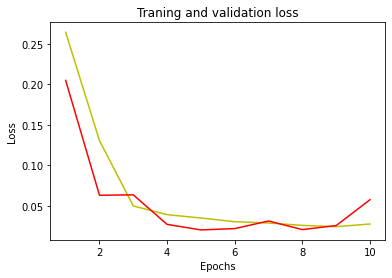

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'y',label='Tranning loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

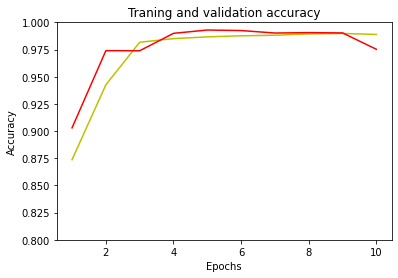

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.show()

[[2576    7    0    3]
 [   0 2622   25    0]
 [   0  221 2475    1]
 [   0    0    3 2558]]


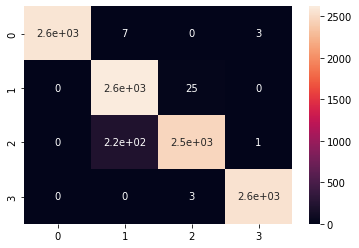

In [ ]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)